
---
title: "Longitudinal Survey Designs"
mathjax: true
toc: true
toc_sticky: true
categories: [data science, statistics]
---

Notes for Chapter 4of [Causal Inference with Survey Data](https://www.linkedin.com/learning/causal-inference-with-survey-data/surveys-with-longitudinal-data?autoSkip=true&resume=false&u=185169545) on LinkedIn Learning, given by Franz Buscha. I'm using this series of posts to take some notes.

In [1]:
import graphviz as gr

In [2]:
def draw_causal_graph(
    edge_list, node_props=None, edge_props=None, graph_direction="UD"
):
    """Utility to draw a causal (directed) graph
    Taken from: https://github.com/dustinstansbury/statistical-rethinking-2023/blob/a0f4f2d15a06b33355cf3065597dcb43ef829991/utils.py#L52-L66

    """
    g = gr.Digraph(graph_attr={"rankdir": graph_direction})

    edge_props = {} if edge_props is None else edge_props
    for e in edge_list:
        props = edge_props[e] if e in edge_props else {}
        g.edge(e[0], e[1], **props)

    if node_props is not None:
        for name, props in node_props.items():
            g.node(name=name, **props)
    return g

# Surveys with longitudinal data

- A series of snapshots.
- Captures information from the same subjects across multiple points in time.
- Useful in understanding how relationships evolve and spotting trends.

**Example: A training program**

Cross-sectional
- snapshot
- static
- limited causality
- quick and cheap

Longitudinal
- time series
- dynamic (can follow someone's productivity over time)
- better causality
- slow and expensive

**Types of longitudinal data**

1. Panel survey
- Collect data on individuals, households, or companies over short time periods. Example: studies of demographic dynamics of families.
2. Cohort survey
- Follow a group of people who share a common characteristic or experience within a defined survey.
3. Repeated cross-section
- Collect data from different samples over time but from the same population.

**Statistical Framework**
- Key to working with time is the t subscript

$$Y_{it} = \beta_0 + \beta_1X1_{it} + ... + \beta_nXn_{it} + \epsilon_{it} $$

- Time subscripts are manipulated by methods in different ways


## Summary
- Allow for a deeper level of analysis, especially for cause-and-effect relationships
- Remember to consider challenges such as data attrition, time-carrying confounders, and complexity of such data
- They often provide a richer and more nuanced view of the world.

# Regression models with time effects

- Adding time to a regression model can significantly improve causal inference
- Time flows in one direction
- Time trends and lagged values are common ways to include time


**OLS with longitudinal data**

- Work with time is the t subscript
- Static model makes no specific use of time from a methods perspective
- Time can be added to this model

**Time manipulation: trends**
- Time can be included as a variable (linear or otherwise)

$$Y_{it} = \beta_0 + \beta_1X1_{it} + \beta_2X2_{it} + \beta_3X3_{it} + \beta_4T_{t} + \epsilon_{it} $$

- T is simply the survey time variable
- Many processes trend, so it makes sense to add time as a control

**Time manipulation: lags**
- Lags help explain how past values of X are related to present values of Y
- Help trace how past events affect today's outcome
- Termed finite distributed lag models of order N

- Model of order 2:

$$Y_{it} = \beta_0 + \beta_1X1_{it} + \beta_2X2_{it} + \beta_3X3_{it} + \beta_4X3_{it-1} + \beta_5X3_{it-2} + \epsilon_{it} $$

X1 and X2 are measured in the present. X3 is measured at three timepoints (present, lag of 1 and lag of 2.)

- $\beta_3, \beta_4, \beta_5$ are independent; they are often summed to estimate a long-run effect of X on Y

- Powerful model for estimating cause and effect of a variable

## Summary

**Advantages**
- Capture dynamic effects
- Temporal causality
- Flexibility

**Disadvantages**
- Require lots of data
- Autocorrelation/multi-collinearity
- Reverse causality

**Conclusion**
- Using time in a regression can be a real game changer
- You can uncover short- and long-run effects, which cannot be done using static models

# Fixed effects regression models

- A straightforward causal method that requires fewer theoretical assumptions.
- Has one major disadvantage - it's terminal.
- Very frequently used with panel data.

**Fixed effect: A DAG approach**

- The focus is on variation over a data unit over time
- X2 and u are confounders
    - X2 can be controlled for but not u
- Fixed effects removes both

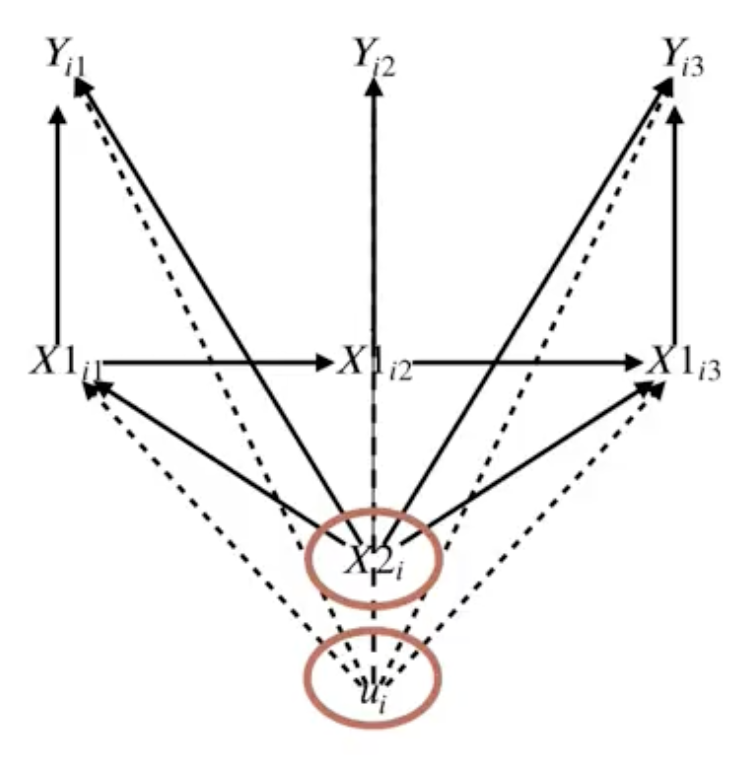



**Implementing FE: LSDV**

- Least Squares Dummy Variable approach (LSDV): include all panel units as dummy variables in a regression

$$Y_{it} = \beta_0 + \beta_1X1_{it} + \beta_2X2_{it} + \beta_3X3_{it} + \lambda_uZ_{u_{it}} + \epsilon_{it} $$

Z is a large vector of dummy variables

- Estimate this using standard regression
- The many $\lambda$ terms control for time-invariant unobserved effects
- Method is disadvantaged if panel is large or limited hardware



**Implementing FE: Within-transformation**
- The within-transformation subtracts the average panel unit value from each measured data point

- The within-transformation subtracts the average panel unit value from each measured data point

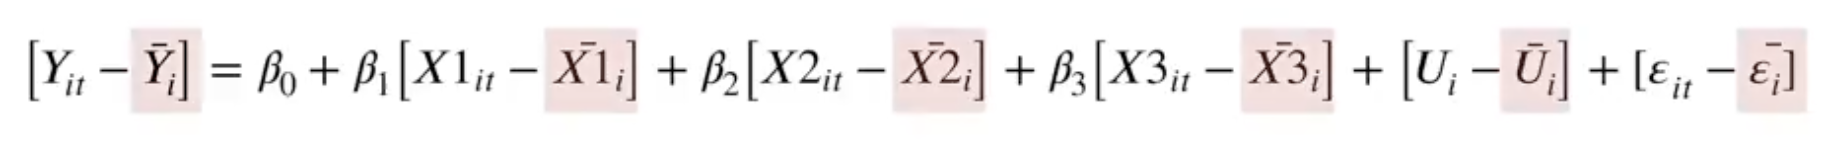

- We're removing data averages from each variable
- Variables that do not vary over time are removed from the model, including unobserved variables


## Summary

**Advantages**
- Control for unobserved confounders
- More credible causal effects

**Disadvantages**
- Less efficient
- Cannot analyze time-invariant variables
- Time-varying confounders

**Conclusion**
- A powerful tool for longitudinal data structures
- Control for unobserved time-invariant confounders
- Always estimate FE models if you can, to see if the results differ
- Continue to think about time-varying confounders


# Difference-in-difference estimation

- Older technique, relatively simple
- It can be done using only four numbers, which is often as good as advanced methods
- Compares the difference in outcomes before and after for two groups = the difference in the differences
- DiD is then the effect of the intervention

**Basic DiD: Minimum Wages**
- Famous study by Card and Kreuger, won Nobel Prize
- They were interested in the effect of minimum wages on employment
- Theory says it can be both good and bad

"Treated":
- New Jersey: Feb 1992 = $4.25
- New Jersey: Nov 1992 = $5.05
- Difference = after - before

"Unreated control":
- Pennsylvania: Feb 1992 = $4.25
- Pennsylvania: Nov 1992 = $4.25


Basic DiD: Minimum Wages (fast food restaurants)

| Average Employment FTE | New Jersey | Penn | Difference |
|---|---|---|---|
| Before | 20.44| 23.33 | -2.89 |
| After | 21.03| 21.17 | -0.14 |
| Difference | 0.59| -2.16 | 2.76 |

To get the full effect of the minimum wage law on employment, in NJ, use the counterfactual: assume NJ would have been on the same trajectory as Penn. That's why you take the difference of the differences ($ 0.59 - (-2.16) $).

Basic DiD: Visualization

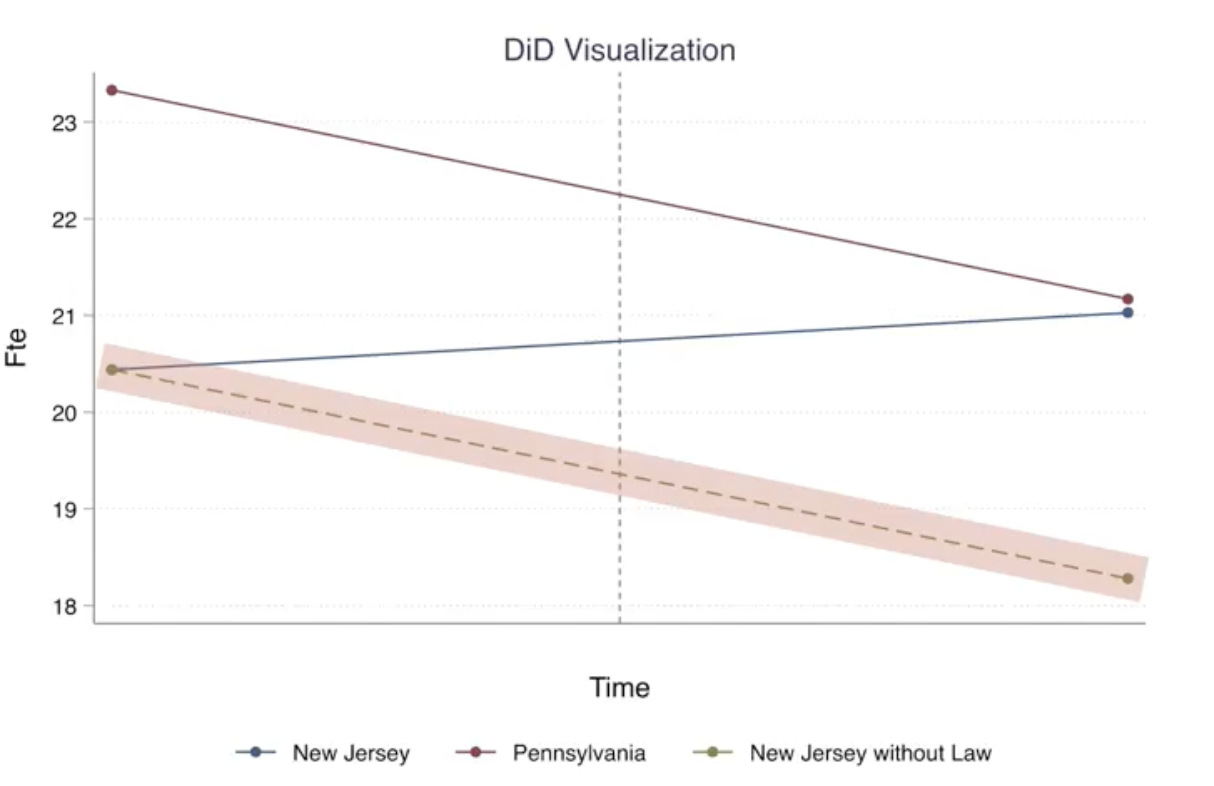

- Key assumption of DiD estimaton is the parallel trend assumption (if nothing had happened, NJ would follow same trend as Penn); represented by dashed line.
- The difference between the end of dashed line and labor supply in NJ is the DiD


**Regression DiD**

- Needed if there are additional confounders:

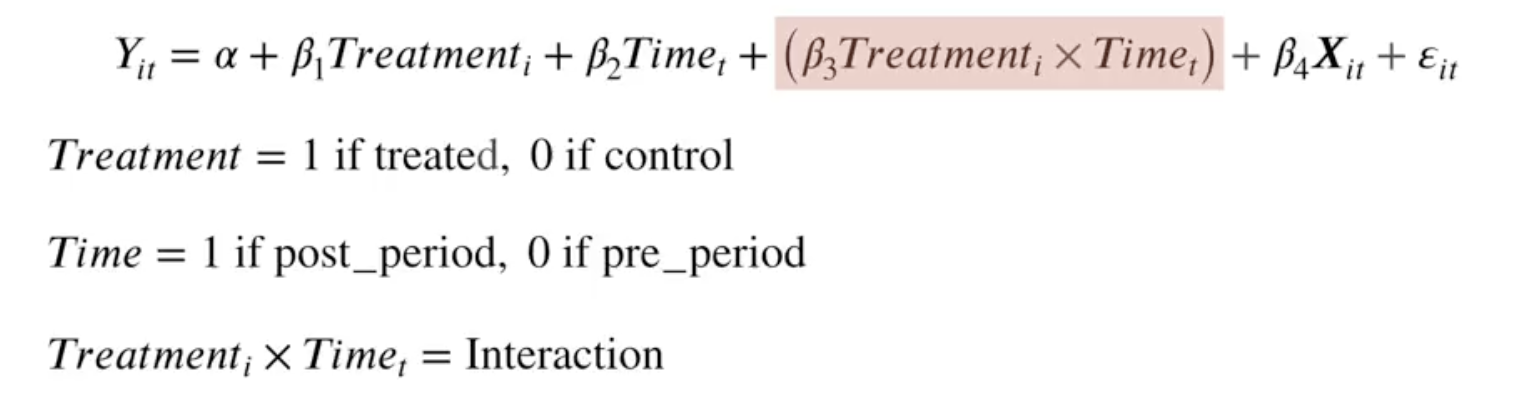


**Assumptions**
- Parallel trends
- No contamination
    - Treatment cannot jump into control group and vice versa

## Summary
**Advantages**
- Unobserved confounders
- Easy to apply
- Flexible (can be combined with other methods like matching techniques or standard regression techniques)

**Disadvantages**
- Requires assumptions to be met
- Can't be used for single-case evaluations

**Conclusions**
- Popular evaluation strategy
- Need good quality data, at least two periods
- But it can offer compelling insights into the causal impact of policies and interventions, to help guide decision making


# Synthetic control methods

- A new innovation in causal inference (last 15 years)
- Somewhat similar to DiD
- Creating a "synthetic control" that looks like the treated (using a weighted combination of potential control units)
- A great approach when no easy controls are available

**Creating the synthetic control**

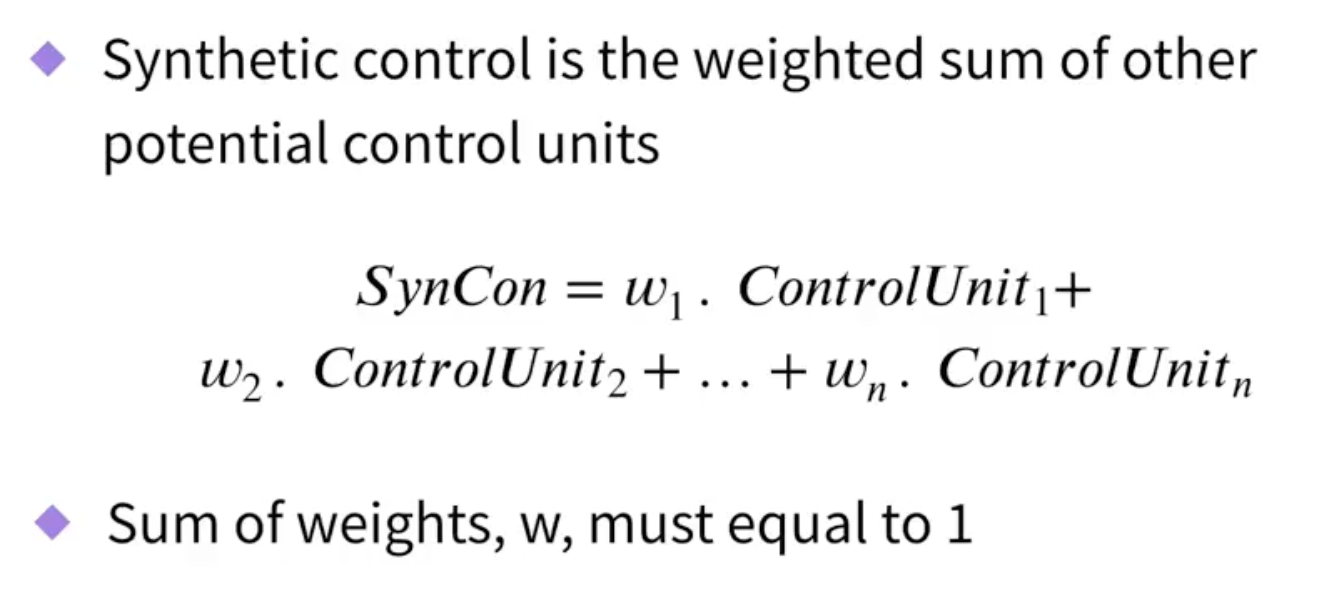

**Estimating the weights**
- The weights minimize the difference between the treated unit and the control before the intervention
- Involves an optimization process
- Typically, it involves control variables that assist in matching the treated and synthetic units

**Control variables**
- Must be unaffected by the intervention/policy/treatment
- Typical control variables include economic or demographic indicators, and other pre-intervention attributes
- The quality of the synthetic control greatly depends on these variables

**Evlauating the intervention**

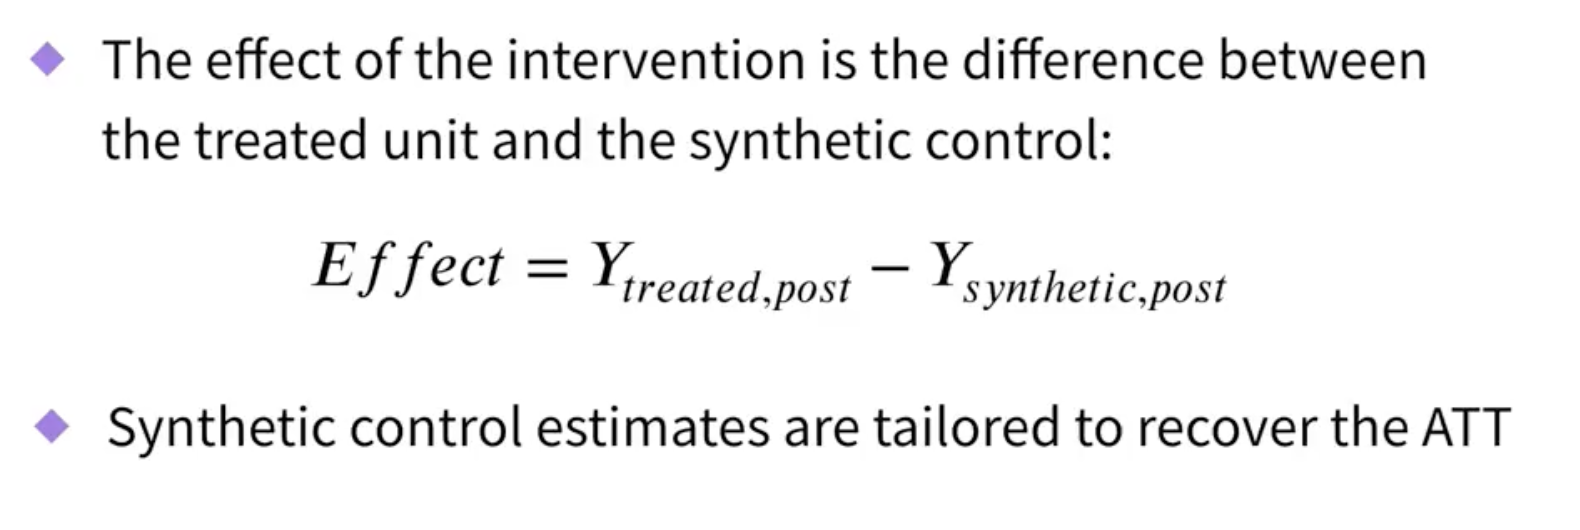


**Cross-Contamination is allowed**
- This occurs when control units are affected by the intervention
- Allowed in scenarios where pure separation between treated and control isn't possible, such as in geographic cases

Example: If CA impelements a new health policy, it's likely neighboring states follow CA and implement some but not all policies. Neighboring control states are not clean. Example is Prop 99 for tobacco legislation.

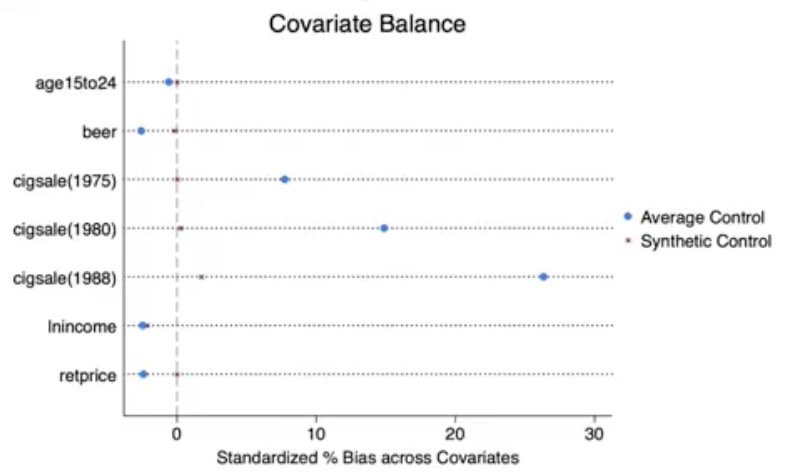

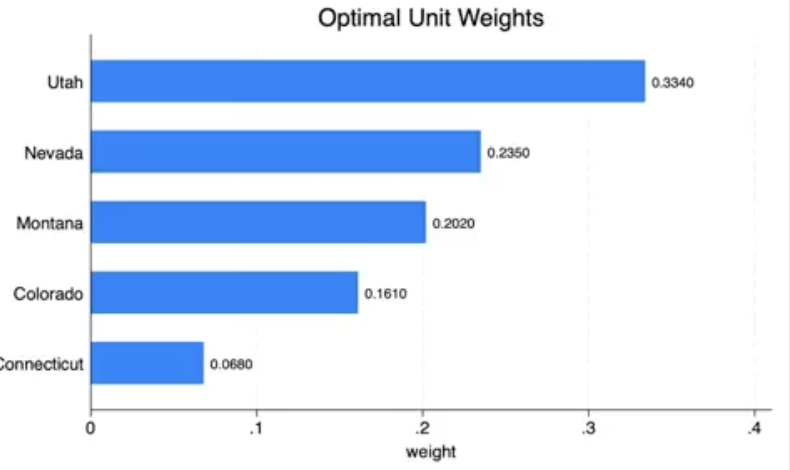

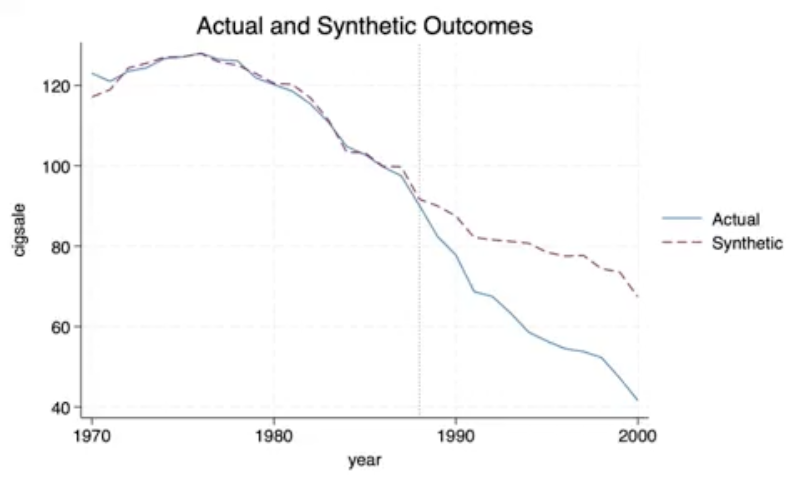

## Summary

**Advantages**
- Handling heterogeneity
- Complex interventions

**Disdvantages**
- Many pretreatment periods
- External validity
- Pre-intervention fit

**Conclusion**
- Synthetic control provides a sophisticated tool
- Especially useful for analysis of interventions that affect only one unit and cross-contamination exists

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri May 24 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.21.0

graphviz: 0.20.1

Watermark: 2.4.3

